01

In [1]:
# Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от 
# количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о 
# зависимости ошибки от этих параметров.

In [2]:
import time
import datetime
import numpy as np

from sklearn import model_selection
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef 
                          in zip(trees_list, coef_list)]) for x in X])

In [4]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [5]:
def bias(y, z):
    return (y - z)

In [6]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):

    trees = []
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=5)
        if not len(trees):
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, 
                                                                       coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, 
                                                                     coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, 
                                                                       coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [7]:
def get_errors(X_train, X_test, y_train, y_test, eta, n_trees):
    all_train_err = {}
    all_test_err = {}
    print('Количество  деревьев:', *list(map(lambda x: f'{x:>15}', n_trees)))
    for depth in range(1, 8, 2):
        train_err = []
        test_err = []
        print(f'Глубина деревьев {depth:>3}:', end=' ')
        for n_tree in n_trees:
            start_time = time.time()

            coefs = [1] * n_tree
            trees, train_errors, test_errors = gb_fit(n_tree, depth, X_train, X_test, y_train, 
                                                      y_test, coefs, eta)
            train_pred = gb_predict(X_train, trees, coefs, eta)
            train_err.append(mean_squared_error(y_train, train_pred))
            test_pred = gb_predict(X_test, trees, coefs, eta)
            test_err.append(mean_squared_error(y_test, test_pred))
            
            finish_time = time.time()
            time_spent = finish_time - start_time
            print(f' {datetime.timedelta(seconds=time_spent)}', end=' ')

        print() # Завершающий штрих в таблице-прогресс-баре

        all_train_err[depth] = train_err
        all_test_err[depth] = test_err
    return all_train_err, all_test_err,eta,n_trees

In [8]:
def plot_errors_graphics(train_err,test_err,eta,n_trees):
    fif, ax= plt.subplots(figsize=(16, 18))
    plt.subplot(2, 2, 1)
    for key in train_err.keys():
        plt.plot(n_trees, train_err[key], label=f'depth={key}')
    plt.title(f'Ошибка на тренировочной выборке \nв зависимости от глубины и числа деревьев')
    plt.xlabel('Количество деревьев')
    plt.ylabel('Величина ошибки')
    plt.legend()
        
    plt.subplot(2, 2, 2)
    for key in test_err.keys():    
        plt.plot(n_trees, test_err[key], label=f'depth={key}')
    plt.title(f'Ошибка на тестовой выборке \nв зависимости от глубины и числа деревьев')
    plt.xlabel('Количество деревьев')
    plt.ylabel('Величина ошибки')
    plt.legend()

    delta_err = {}
    for key_name in list(tr_err.keys()):
        delta_err[key_name] = np.abs(np.array(tr_err.get(key_name)) - 
                                     np.array(tst_err.get(key_name)))

    plt.subplot(2, 2, (3, 4))
    for key in test_err.keys():    
        plt.plot(n_trees, delta_err[key], label=f'depth={key}')
    plt.title(f'Разность между ошибками трейна и теста')
    plt.xlabel('Количество деревьев')
    plt.ylabel('Разность между ошибками')
    plt.legend()
    plt.show()

In [9]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25)

In [10]:
n_trees = [1, 2, 5, 10, 20, 30]
eta = 0.1
tr_err, tst_err, eta, n_trees = get_errors(X_train, X_test, y_train, y_test, eta, n_trees)

Количество  деревьев:               1               2               5              10              20              30
Глубина деревьев   1:  0:00:00.016778  0:00:00.050226  0:00:00.291554  0:00:01.132529  0:00:04.475891  0:00:09.941991 
Глубина деревьев   3:  0:00:00.013440  0:00:00.048450  0:00:00.290221  0:00:01.126925  0:00:04.397419  0:00:09.814545 
Глубина деревьев   5:  0:00:00.014096  0:00:00.050485  0:00:00.295507  0:00:01.137284  0:00:04.407863  0:00:09.924563 
Глубина деревьев   7:  0:00:00.015387  0:00:00.053646  0:00:00.301918  0:00:01.140795  0:00:04.427284  0:00:09.940567 


/tmp/ipykernel_20389/2896622986.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


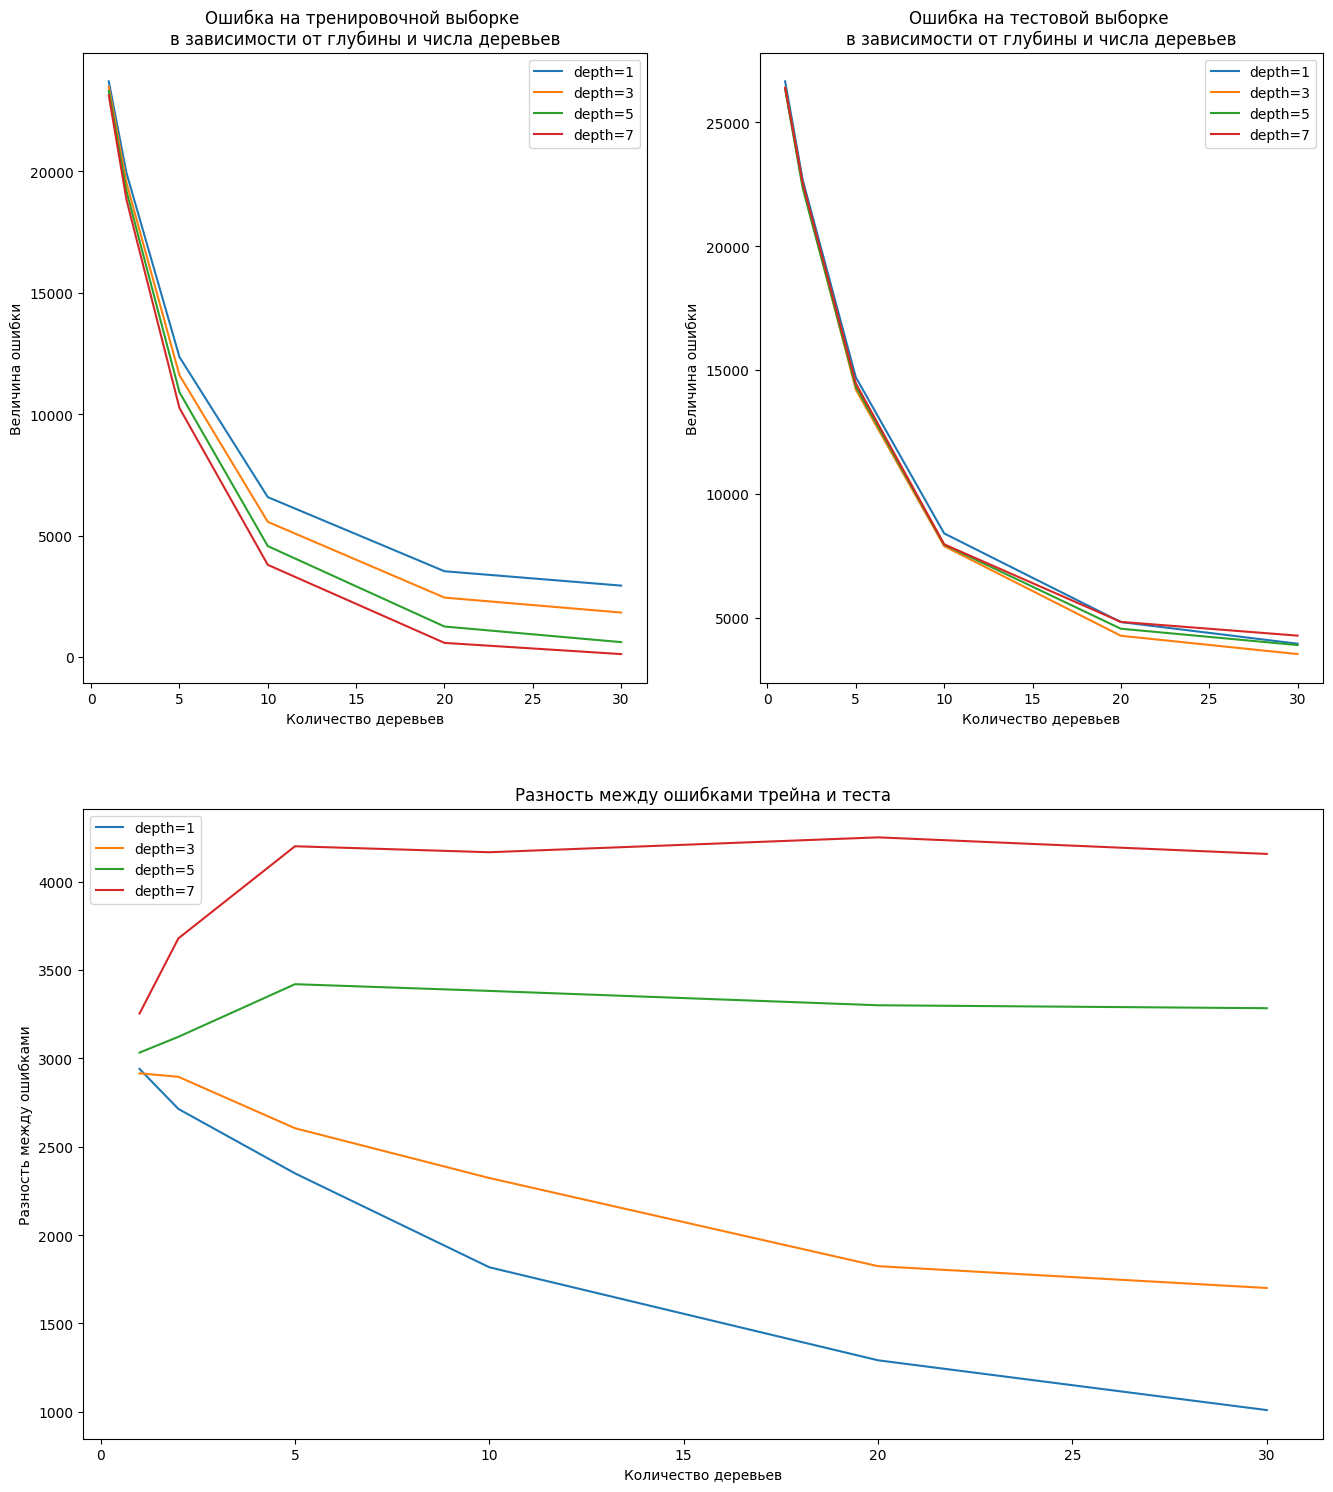

In [11]:
plot_errors_graphics(tr_err, tst_err, eta, n_trees)

На последнем графике видно, что оптимальным решением будет увеличивать количество деревьев при минимальной глубине: так ошибка между трейновыми и тестовыми данными будет наименьшей. Тестовая ошибка получается минимальной при аналогичном соотношении.
(По результатам графиков, которые мы сюда не приложили, точка останова находится где-то в районе количества деревьев, равном 30. Мы самостоятельно рассчитали и отрисовали график ошибок при бОльшем количестве деревьев, и теперь можем сообщить, что эта информация нерелевантна, считать ее долго по времени, поэтому мимальным количеством деревьев мы поставили 30).

02

In [12]:
# Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. 
# Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на 
# тестовой выборке в зависимости от числа итераций.

In [13]:

def gb_sgd_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):

    trees = []
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        random_idx = set()
        
        while len(random_idx) < X_train.shape[0] // 2:
            random_idx.add(np.random.randint(0, X_train.shape[0]))
        random_idx = list(random_idx)

        if not len(trees):
            tree.fit(X_train[random_idx], y_train[random_idx])
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, 
                                                                       coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, 
                                                                     coefs, eta)))
        else:
            target = gb_predict(X_train, trees, coefs, eta)
            
            tree.fit(X_train[random_idx], bias(y_train[random_idx], target[random_idx]))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, 
                                                                       coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [14]:
def get_error_plot(n_trees, train_err, test_err):
    plt.figure(figsize=(16,10))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='sgd_train error')
    plt.legend(loc='upper right')
    plt.show()

In [15]:
n_trees = 100
max_depth = 4
coefs = [1] * n_trees
eta = .1
trees, tr_err, tst_err=gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
sgd_trees, sgd_tr_err, sgd_tst_err = gb_sgd_fit(n_trees, max_depth, X_train, X_test, 
                                                y_train, y_test, coefs, eta)

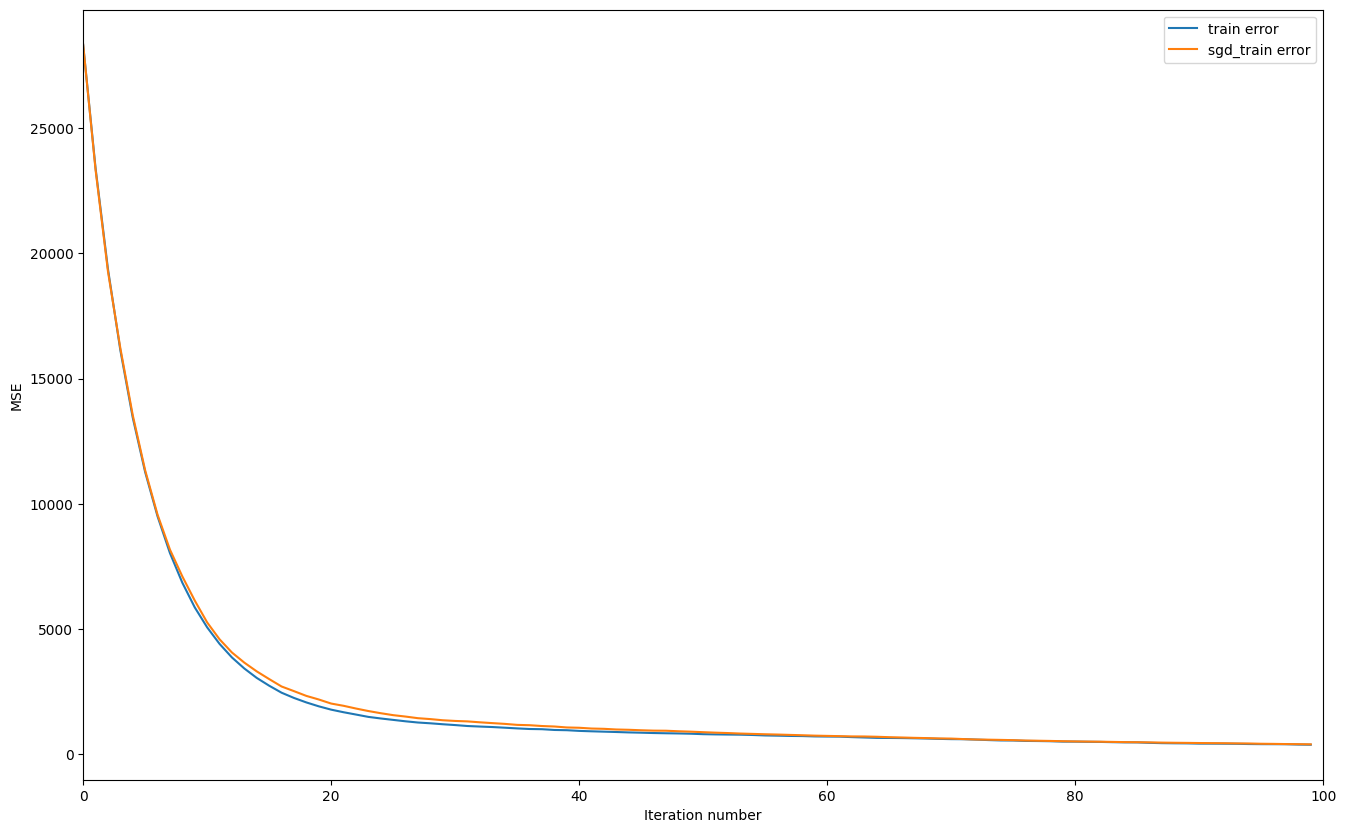

In [16]:
get_error_plot(n_trees, tr_err, sgd_tr_err)

Изменения настолько незначительные, что порой невидны глазу.